In [1]:
import pandas as pd
import numpy as np
import pickle
import os
from tqdm import tqdm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

import copy

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import matplotlib as mpl

In [2]:
#matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
#mpl.style.use("default")
#mpl.rcParams.update({"figure.constrained_layout.use": True})
#
#sns.set_context("paper") 
#sns.set_palette("Set2") 
#sns.set_style("whitegrid") 
#
#plt.rc("font", family = "Malgun Gothic")
#plt.rcParams["axes.unicode_minus"] = False

In [3]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 
# 이미지가 레이아웃 안으로 들어오도록 함
mpl.rcParams.update({"figure.constrained_layout.use": True})

In [4]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list if 'D2C' in font]
plt.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

## Load KNN processed data

In [5]:
RSLT_DIR = './processed/'

In [6]:
# column lists used for KNN Processing

col_cand_list=[
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Deaths | Premature Death',
    'Income Inequality | Household Income Inequality',
    'Income | Households with Higher-Incomes',
    'Life Expectancy at Birth | Life Expectancy',
    'Substance Use | Adult Smoking',
    'Births | Preterm Births',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Cardiovascular Disease | Heart Disease Deaths',
    'Deaths | Infant Deaths',
    'Deaths | Premature Death',
    'Income Inequality | Household Income Inequality',
    'Income | Households with Higher-Incomes',
    'Income | Per-capita Household Income',
    'Language and Nativity | Primarily Speak English',
    'Life Expectancy at Birth | Life Expectancy',
    'Substance Use | Adult Smoking',
    'Cancer | All Cancer Deaths',
    'Cancer | Breast Cancer Deaths',
    'Cancer | Lung Cancer Deaths',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Cardiovascular Disease | Heart Disease Deaths',
    'Language and Nativity | Primarily Speak Spanish',
    'Births | Teen Births',
    'Cancer | All Cancer Deaths',
    'Cancer | Breast Cancer Deaths',
    'Cancer | Lung Cancer Deaths',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Cardiovascular Disease | Heart Disease Deaths',
    'Heat and Disasters | Community Social Vulnerability to Climate Disasters',
    'Income-related | Unemployment',
    'Language and Nativity | Primarily Speak Spanish',
    'Mental Health | Suicide',
    'Race/Ethnicity | Minority Population',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Deaths | Premature Death',
    'Income Inequality | Household Income Inequality',
    'Income | Households with Higher-Incomes',
    'Life Expectancy at Birth | Life Expectancy',
    'Substance Use | Adult Smoking',
    'Births | Preterm Births',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Cardiovascular Disease | Heart Disease Deaths',
    'Deaths | Infant Deaths',
    'Deaths | Premature Death',
    'Income Inequality | Household Income Inequality',
    'Income | Households with Higher-Incomes',
    'Income | Per-capita Household Income',
    'Language and Nativity | Primarily Speak English',
    'Life Expectancy at Birth | Life Expectancy',
    'Substance Use | Adult Smoking',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Deaths | Premature Death',
    'Income Inequality | Household Income Inequality',
    'Income | Households with Higher-Incomes',
    'Life Expectancy at Birth | Life Expectancy',
    'Substance Use | Adult Smoking',
    'Births | Preterm Births',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Cardiovascular Disease | Heart Disease Deaths',
    'Deaths | Infant Deaths',
    'Deaths | Premature Death',
    'Income Inequality | Household Income Inequality',
    'Income | Households with Higher-Incomes',
    'Income | Per-capita Household Income',
    'Language and Nativity | Primarily Speak English',
    'Life Expectancy at Birth | Life Expectancy',
    'Substance Use | Adult Smoking',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Deaths | Premature Death',
    'Income Inequality | Household Income Inequality',
    'Income | Households with Higher-Incomes',
    'Life Expectancy at Birth | Life Expectancy',
    'Substance Use | Adult Smoking',
    'Births | Preterm Births',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Cardiovascular Disease | Heart Disease Deaths',
    'Deaths | Infant Deaths',
    'Deaths | Premature Death',
    'Income Inequality | Household Income Inequality',
    'Income | Households with Higher-Incomes',
    'Income | Per-capita Household Income',
    'Language and Nativity | Primarily Speak English',
    'Life Expectancy at Birth | Life Expectancy',
    'Substance Use | Adult Smoking',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Cardiovascular Disease | Heart Disease Deaths',
    'Deaths | Motor Vehicle Deaths',
    'Deaths | Premature Death',
    'Diabetes and Obesity | Diabetes Deaths',
    'Life Expectancy at Birth | Life Expectancy',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Cardiovascular Disease | Heart Disease Deaths',
    'Deaths | Gun Deaths (Firearms)',
    'Deaths | Motor Vehicle Deaths',
    'Deaths | Premature Death',
    'Diabetes and Obesity | Diabetes Deaths',
    'Language and Nativity | Foreign Born Population',
    'Life Expectancy at Birth | Life Expectancy',
    'Mental Health | Adult Mental Distress',
    'Racial Segregation Indices | Racial Segregation, White and Non-White',
    'Respiratory Infection | COVID-19 Deaths',
    'Respiratory Infection | New Tuberculosis Cases',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Cardiovascular Disease | Heart Disease Deaths',
    'Deaths | Motor Vehicle Deaths',
    'Deaths | Premature Death',
    'Diabetes and Obesity | Diabetes Deaths',
    'Life Expectancy at Birth | Life Expectancy',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Cardiovascular Disease | Heart Disease Deaths',
    'Deaths | Gun Deaths (Firearms)',
    'Deaths | Motor Vehicle Deaths',
    'Deaths | Premature Death',
    'Diabetes and Obesity | Diabetes Deaths',
    'Language and Nativity | Foreign Born Population',
    'Life Expectancy at Birth | Life Expectancy',
    'Mental Health | Adult Mental Distress',
    'Racial Segregation Indices | Racial Segregation, White and Non-White',
    'Respiratory Infection | COVID-19 Deaths',
    'Respiratory Infection | New Tuberculosis Cases',
    'Deaths | Gun Deaths (Firearms)',
    'Deaths | Premature Death',
    'Life Expectancy at Birth | Life Expectancy',
    'Mental Health | Suicide',
    'Substance Use | Drug Overdose Deaths',
    'Substance Use | Opioid Overdose Deaths',
    'Crime Incidents | Homicides',
    'Deaths | Deaths from All Causes',
    'Deaths | Gun Deaths (Firearms)',
    'Deaths | Motor Vehicle Deaths',
    'Deaths | Premature Death',
    'Food Access | Limited Supermarket Access',
    'Language and Nativity | Foreign Born Population',
    'Life Expectancy at Birth | Life Expectancy',
    'Mental Health | Suicide',
    'Sexually Transmitted Disease | New Gonorrhea Cases',
    'Substance Use | Drug Overdose Deaths',
    'Substance Use | Opioid Overdose Deaths',
    'Active Transportation | Walking to Work',
    'Deaths | Deaths from All Causes',
    'Deaths | Premature Death',
    'Education | Preschool Enrollment',
    'Lead Poisoning | Child Lead Levels 5+ mcg/dL',
    'Transportation | Public Transportation Use',
    'Active Transportation | Walking to Work',
    'Deaths | Deaths from All Causes',
    'Deaths | Gun Deaths (Firearms)',
    'Deaths | Infant Deaths',
    'Deaths | Premature Death',
    'Education | Preschool Enrollment',
    'Heat and Disasters | Longer Summers',
    'Income-related | Service Workers',
    'Language and Nativity | Primarily Speak Chinese',
    'Lead Poisoning | Child Lead Levels 5+ mcg/dL',
    'Mental Health | Suicide',
    'Transportation | Public Transportation Use',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Crime Incidents | Homicides',
    'Deaths | Deaths from All Causes',
    'Deaths | Gun Deaths (Firearms)',
    'Deaths | Injury Deaths',
    'Life Expectancy at Birth | Life Expectancy',
    'Births | Low Birthweight',
    'Births | Preterm Births',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Cardiovascular Disease | Heart Disease Deaths',
    'Crime Incidents | Homicides',
    'Crime Incidents | Violent Crime',
    'Deaths | Deaths from All Causes',
    'Deaths | Gun Deaths (Firearms)',
    'Deaths | Injury Deaths',
    'Deaths | Maternal Deaths',
    'Life Expectancy at Birth | Life Expectancy',
    'Mental Health | Adult Mental Distress',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Deaths | Deaths from All Causes',
    'Education | College Graduates',
    'Income Inequality | Income Inequality',
    'Lead Poisoning | Housing Lead Risk',
    'Racial Segregation Indices | Racial Segregation, White and Black',
    'Cardiovascular Disease | Cardiovascular Disease Deaths',
    'Deaths | Deaths from All Causes',
    'Deaths | Racial Disparity in Police Killings',
    'Disability | People with Disabilities',
    'Education | College Graduates',
    'Income Inequality | Income Inequality',
    'Income-related | Service Workers',
    'Lead Poisoning | Housing Lead Risk',
    'Population | Single-Parent Families',
    'Race/Ethnicity | Minority Population',
    'Racial Segregation Indices | Racial Segregation, White and Black',
    'Racial Segregation Indices | Racial Segregation, White and Non-White',
    'Active Transportation | Riding Bike to Work',
    'Education | Preschool Enrollment',
    'Housing | Owner Occupied Housing',
    'Population | Population Density',
    'Race/Ethnicity | Minority Population',
    'Racial Segregation Indices | Racial Segregation, White and Black',
    'Active Transportation | Riding Bike to Work',
    'Education | Preschool Enrollment',
    'Housing | Homeless, Total',
    'Housing | Owner Occupied Housing',
    'Housing | Renters vs. Owners',
    'Income Inequality | Income Inequality',
    'Population | Population Density',
    'Race/Ethnicity | Minority Population',
    'Racial Segregation Indices | Racial Segregation, White and Black',
    'Racial Segregation Indices | Racial Segregation, White and Hispanic',
    'Transportation | Lack of Car',
    'Transportation | Longer Driving Commute Time',
    'Deaths | Injury Deaths',
    'Health Insurance | Uninsured, All Ages',
    'Housing | Homeless, Total',
    'Mental Health | Adult Mental Distress',
    'Sexually Transmitted Disease | Syphilis Prevalence',
    'Sexually Transmitted Disease | Syphilis, Newborns',
    'Deaths | Injury Deaths',
    'Health Insurance | Uninsured, All Ages',
    'Health Insurance | Uninsured, Child',
    'Housing | Homeless, Children',
    'Housing | Homeless, Total',
    'Housing | Vacant Housing and Homelessness',
    'Lead Poisoning | Child Lead Levels 5+ mcg/dL',
    'Mental Health | Adult Mental Distress',
    'Population | Children',
    'Sexually Transmitted Disease | Syphilis Prevalence',
    'Sexually Transmitted Disease | Syphilis, Newborns',
]

col_cand_list2 = ['Physical Activity | Teen Physical Activity',
 'Physical Activity | Adult Physical Inactivity',
 'Substance Use | Teen Smoking',
 'School Violence | Weapons in School',
 'Dietary Quality | Teen Breakfast',
 'Income-related | Public Assistance',
 'Income | Poverty in Children',
 'Mental Health | Electronic Bullying',
 'Cardiovascular Disease | High Blood Pressure',
 'Sexually Transmitted Disease | HIV/AIDS Prevalence',
 'Income | Poverty in All Ages',
 'Lead Poisoning | Child Lead Testing',
 'Cancer | Prostate Cancer Deaths',
 'Air Pollution | Poor Air Quality',
 'Births | Prenatal Care',
 'Diabetes and Obesity | Adult Obesity',
 'Diabetes and Obesity | Teen Obesity',
 'Dietary Quality | Teen Soda',
 'Substance Use | Teen Marijuana',
 'Population | Seniors',
 'School Violence | Fighting in School',
 'Income-related | Excessive Housing Cost',
 'Diabetes and Obesity | Diabetes',
 'Mental Health | School Bullying',
 'Housing | Vacant Housing Units',
 'Heat and Disasters | Number of Heat Waves',
 'Respiratory Infection | Pneumonia or Influenza Deaths',
 'Mental Health | Teen Mental Distress',
 'Sexually Transmitted Disease | HIV-Related Deaths',
 'Substance Use | Adult Binge Drinking',
 'Income | Poverty and Near Poverty in All Ages',
 'Deaths | Police Killings',
 'Lead Poisoning | Child Lead Levels 10+ mcg/dL',
 'Substance Use | Teen Alcohol',
 'Physical Activity | Teen Physical Inactivity',
 'Air Pollution | Hazardous Air Quality',
 'Mental Health | Teen Suicidal Ideation',
 'Transportation | Drives Alone to Work',
 'Heat and Disasters | Climate-related Disasters']

info_cols = [
    'city_idx',
    'encoded_strata_race_label',
    'encoded_strata_sex_label',
    'encoded_geo_strata_region',
    'encoded_geo_strata_poverty',
    'encoded_geo_strata_Population',
    'encoded_geo_strata_PopDensity',
    'encoded_geo_strata_Segregation',
    'date_label',
]

In [7]:
def make_reg_score_dict(y_pred,y_actual,base_val):
    rmse_model, rmse_base = np.sqrt(mse(y_actual,y_pred)), np.sqrt(mse([base_val]*len(y_actual),y_actual))
    msle_model, msle_base = 0, 0 #msle(valid_y,y_pred) : negtive value error occurs but i don't know why #msle(valid_y,[train_y.mean()]*len(valid_y)) :
    mape_model, mape_base = mape(y_actual,y_pred), mape([base_val]*len(y_actual),y_actual)
    r2_model, r2_base = r2_score(y_actual,y_pred), 0
    
    return {
        'rmse' : [rmse_model, rmse_base],
        'msle' : [msle_model, msle_base],
        'mape' : [mape_model, mape_base],
        'r2_score' : [r2_model,r2_base]
    }

def print_reg_score_dict(name,dict_score):
    print('{}\nr2 score : {:.5f}'.format(name,dict_score['r2_score'][0]))
    print('rmse_model : {:.5f} / rmse_base : {:.5f}\t'.format(*dict_score['rmse']),
          'mape_model : {:.5f} / mape_base : {:.5f}\t'.format(*dict_score['mape']),
          'msle_model : {:.5f} / msle_base : {:.5f}'.format(*dict_score['msle']))


def make_reg_score_dict_cols(target_sample,dict_df,dict_train_test,dict_rslt,print_plot=False):
    dict_score = dict()
    for col in target_sample:
        train_y = dict_df[col]['train'][1]
        valid_y = dict_train_test[col][3]
        y_pred = dict_rslt[col]['valid']
        dict_score[col] = make_reg_score_dict(y_pred,valid_y,np.mean(train_y))
        if print_plot :
            print_reg_score_dict(col,dict_score[col])
            print('-'*150)
    return dict_score

In [8]:
DATASET_DIR = '/home/doeun/code/AI/ESTSOFT2024/workspace/dataset/'
load_dir = 'america_big_cities_health_inventory'
file_name = 'BigCitiesHealth.csv'
RSLT_DIR = '/home/doeun/code/AI/ESTSOFT2024/workspace/1.project1_structured/BCHI/processed/'
PVTB_DIR = RSLT_DIR + 'pvtb/'

## Load k-NN regression result

In [9]:
pvtb_name = 'pvtb_city_encoded_ver1.csv'
pvtb_encoded = pd.read_csv(os.path.join(PVTB_DIR,pvtb_name),index_col=0)

cand_cols = list(set(col_cand_list))
entire_label = list(pvtb_encoded.columns)[9:]
target_cols = list(filter(lambda x : x in cand_cols,entire_label))

geo_name = 'geo_strat_info.csv'
geo_info_path = os.path.join(RSLT_DIR,geo_name)
geo_strat_info = pd.read_csv(geo_info_path, index_col=0)
city_list = list(geo_strat_info.index)

knn_dir = 'knn_rslt'
knn_path = os.path.join(RSLT_DIR,knn_dir)
work_idx = 0
n_work = 10

In [10]:
cand_cols = sorted(list(set(col_cand_list)))
entire_label = list(pvtb_encoded.columns)[9:]
info_cols = [
    'city_idx',
    'encoded_strata_race_label',
    'encoded_strata_sex_label',
    'encoded_geo_strata_region',
    'encoded_geo_strata_poverty',
    'encoded_geo_strata_Population',
    'encoded_geo_strata_PopDensity',
    'encoded_geo_strata_Segregation',
    'date_label',
]


In [11]:

metric, n_neigh = 'custom', 7
col_select = 'cand'
if col_select == 'else' : target_cols = list(filter(lambda x : x not in cand_cols,entire_label))
if col_select == 'cand' : target_cols = cand_cols

prjct_name = '{}{}_ver2_{}'.format(metric,n_neigh,col_select)
n_work = 10 

In [12]:
pvtb_encoded['city_idx'] = pvtb_encoded['geo_label_city'].apply(lambda x : city_list.index(x))
temp = list(pvtb_encoded.columns)
pvtb_encoded_whole = pvtb_encoded[['city_idx']+temp[1:-1]]
test_df = pvtb_encoded[info_cols+target_cols]

knn_path = os.path.join(RSLT_DIR,f'knn_{prjct_name}')
files = list(filter(lambda x : '.pkl' in x,os.listdir(knn_path)))

file_dict = dict()

keys = ['dict_rslt','dict_train_test']
for filename in files:
    if filename[-4:] != '.pkl' : continue
    key = list(filter(lambda x : x in filename,keys))[0]
    file_path = os.path.join(knn_path,filename)
    with open (file_path,'rb') as f:
        name = filename[len(key)+1:-4]
        if name in file_dict : file_dict[name][key] = pickle.load(f)
        else : file_dict[name] = {key : pickle.load(f)}

In [13]:
knn_score_dict = dict()
base_score_dict = dict()

for key,ele_dict in tqdm(file_dict.items()):
    dict_rslt = ele_dict['dict_rslt']
    dict_train_test = ele_dict['dict_train_test']
    target_sample= list(dict_rslt.keys())
    rslt_form = test_df[info_cols+target_sample]

    for col in target_sample:
        cond = test_df[col].isna()
        loaded = dict_rslt[col]['target']
        assert np.sum(cond) == len(loaded)  
        rslt_form.loc[cond,col] = loaded

    dict_df = dict()
    for col in target_sample:
        temp = test_df[info_cols+[col]]
        cond_na = temp.isna().any(axis=1)
        dict_df[col] = {
            'train' : [temp.loc[~cond_na,info_cols], temp.loc[~cond_na,col]],
            'target' : [temp.loc[cond_na,info_cols], cond_na],
        }
    
    ## check score
    dict_score = make_reg_score_dict_cols(target_sample,dict_df,dict_train_test,dict_rslt,print_plot=False)
    
    knn_score = copy.deepcopy(dict_score)
    base_score = copy.deepcopy(dict_score)
    for key in dict_score.keys():
        for key2 in dict_score[key].keys():
            knn_score[key][key2] = knn_score[key][key2][0]
            base_score[key][key2] = base_score[key][key2][1]
    
    knn_score_dict = {**knn_score_dict,**knn_score}
    base_score_dict = {**base_score_dict,**base_score}

100%|██████████| 10/10 [00:00<00:00, 17.43it/s]


## Load k-NN regression result 2

In [14]:

metric, n_neigh = 'custom', 7
col_select = 'else'
if col_select == 'else' : target_cols = list(filter(lambda x : x not in cand_cols,entire_label))
if col_select == 'cand' : target_cols = cand_cols

prjct_name = '{}{}_ver2_{}'.format(metric,n_neigh,col_select)
n_work = 10 

In [15]:
pvtb_encoded['city_idx'] = pvtb_encoded['geo_label_city'].apply(lambda x : city_list.index(x))
temp = list(pvtb_encoded.columns)
pvtb_encoded_whole = pvtb_encoded[['city_idx']+temp[1:-1]]
test_df = pvtb_encoded[info_cols+target_cols]

knn_path = os.path.join(RSLT_DIR,f'knn_{prjct_name}')
files = list(filter(lambda x : '.pkl' in x,os.listdir(knn_path)))

file_dict = dict()

keys = ['dict_rslt','dict_train_test']
for filename in files:
    if filename[-4:] != '.pkl' : continue
    key = list(filter(lambda x : x in filename,keys))[0]
    file_path = os.path.join(knn_path,filename)
    with open (file_path,'rb') as f:
        name = filename[len(key)+1:-4]
        if name in file_dict : file_dict[name][key] = pickle.load(f)
        else : file_dict[name] = {key : pickle.load(f)}

In [16]:
for key,ele_dict in tqdm(file_dict.items()):
    dict_rslt = ele_dict['dict_rslt']
    dict_train_test = ele_dict['dict_train_test']
    target_sample= list(dict_rslt.keys())
    rslt_form = test_df[info_cols+target_sample]

    for col in target_sample:
        cond = test_df[col].isna()
        loaded = dict_rslt[col]['target']
        assert np.sum(cond) == len(loaded)  
        rslt_form.loc[cond,col] = loaded

    dict_df = dict()
    for col in target_sample:
        temp = test_df[info_cols+[col]]
        cond_na = temp.isna().any(axis=1)
        dict_df[col] = {
            'train' : [temp.loc[~cond_na,info_cols], temp.loc[~cond_na,col]],
            'target' : [temp.loc[cond_na,info_cols], cond_na],
        }
    
    ## check score
    dict_score = make_reg_score_dict_cols(target_sample,dict_df,dict_train_test,dict_rslt,print_plot=False)
    
    knn_score = copy.deepcopy(dict_score)
    base_score = copy.deepcopy(dict_score)
    for key in dict_score.keys():
        for key2 in dict_score[key].keys():
            knn_score[key][key2] = knn_score[key][key2][0]
            base_score[key][key2] = base_score[key][key2][1]
    
    knn_score_dict = {**knn_score_dict,**knn_score}
    base_score_dict = {**base_score_dict,**base_score}

100%|██████████| 10/10 [00:00<00:00, 22.76it/s]


In [17]:
# knn_score_dict

for key in knn_score_dict.keys():
    temp = knn_score_dict[key]
    knn_score_dict[key] = dict()
    knn_score_dict[key][True] = temp
    knn_score_dict[key][False] = temp

for key in base_score_dict.keys():
    temp = base_score_dict[key]
    base_score_dict[key] = dict()
    base_score_dict[key][True] = temp
    base_score_dict[key][False] = temp

## LOAD RFC DATA

In [18]:
rfc_knn = dict()
for n_est in [50,100,500]:
    for h in [True, False]:
        suffix = "_h" if h else ""
        with open(f"../results/rf/result_rf_{n_est}{suffix}.pickle",'rb') as file:
            score = pickle.load(file)
            if n_est not in rfc_knn.keys():
                rfc_knn[n_est] = dict()
            rfc_knn[n_est][h]= score

rfc_orig = dict()
for n_est in [50,100,500]:
    for h in [True, False]:
        suffix = "_h" if h else ""
        with open(f"../results/rf/result_reindex_{n_est}{suffix}.pickle",'rb') as file:
            score = pickle.load(file)
            if n_est not in rfc_orig.keys():
                rfc_orig[n_est] = dict()
            rfc_orig[n_est][h]= score

# with open("./results/rf/rf.pickle","rb") as file:
#     rfc_knn = pickle.load(file)

# with open("./results/rf/rf_reindex.pickle","rb") as file:
#     rfc_orig = pickle.load(file)

In [19]:
for res in [rfc_knn, rfc_orig]:
    for idx, key in enumerate(res.keys()):
        data_dict = res[key]
        # print(data_dict)
        for val in data_dict.values():
            for val2 in val.values():
                if "feature_importance" in val2.keys():
                    del val2["feature_importance"]

## Load XGB Data

In [20]:
# for lr in [0.01,0.05,0.1]:
#     for n_est in [100,300,500]:
#         for h in [True, False]:
#             suffix = "_h" if h else ""
#             with open(f"./results/xgb/result_xgb_{lr}_{n_est}{suffix}.pickle",'rb') as file:
#                 score = pickle.load(file)
#                 print(score)

In [21]:
with open(f"../results/xgb/xgb.pickle",'rb') as file:
    xgb_knn = pickle.load(file)

with open(f"../results/xgb/reindexed_xgb.pickle",'rb') as file:
    xgb_orig = pickle.load(file)

In [22]:
for res in [xgb_knn, xgb_orig]:
    for idx, key in enumerate(res.keys()):
        data_dict = res[key]
        # print(data_dict)
        for val in data_dict.values():
            for val2 in val.values():
                for val3 in val2.values():
                    del val3["feature_importance"]

## LOAD MLP DATA

In [23]:
with open("../results/mlp/mlp.pickle",'rb') as file:
    mlp_knn = pickle.load(file)

with open("../results/mlp/mlp_reindex.pickle",'rb') as file:
    mlp_orig = pickle.load(file)

## COMBINE

In [24]:
combined_scores = dict()
combined_scores["MLP-KNN"] = mlp_knn
combined_scores["MLP"] = mlp_orig
combined_scores["RFC-KNN"] = rfc_knn
combined_scores["RFC"] = rfc_orig
combined_scores["KNN"] = knn_score_dict
combined_scores["Base"] = base_score_dict
combined_scores["XGB-KNN"] = xgb_knn
# combined_scores["XGB"] = xgb_orig


In [25]:
def flatten_dict(nested_dict):
    res = {}
    if isinstance(nested_dict, dict):
        for k in nested_dict:
            flattened_dict = flatten_dict(nested_dict[k])
            for key, val in flattened_dict.items():
                key = list(key)
                key.insert(0, k)
                res[tuple(key)] = val
    else:
        res[()] = nested_dict
    return res


def nested_dict_to_df(values_dict):
    flat_dict = flatten_dict(values_dict)
    df = pd.DataFrame.from_dict(flat_dict, orient="index")
    df.index = pd.MultiIndex.from_tuples(list(df.index))
    # print(df.index)
    df = df.unstack(level=-1)
    df.columns = df.columns.map("{0[1]}".format)
    return df

In [26]:
# score_dict = dict()
# for key in combined_scores.keys():
#     for key2 in combined_scores[key].keys():
#         for key3 in combined_scores[key][key2].keys():
#             score_dict[key3] = copy.deepcopy(combined_scores)

# for key in score_dict[True].keys():
#     score_dict[True][key] = score_dict[True][key][True]

# for key in score_dict[False].keys():
#     score_dict[False][key] = score_dict[True][key][False]


In [27]:
df_in = pd.json_normalize(combined_scores,sep='/')
df_in.columns = df_in.columns.str.split('/', expand=True)
df_reform = df_in.unstack()
df = df_reform.reset_index()

In [28]:
# xgb_knn[0.1][100][True]['Cancer | All Cancer Deaths'].keys()

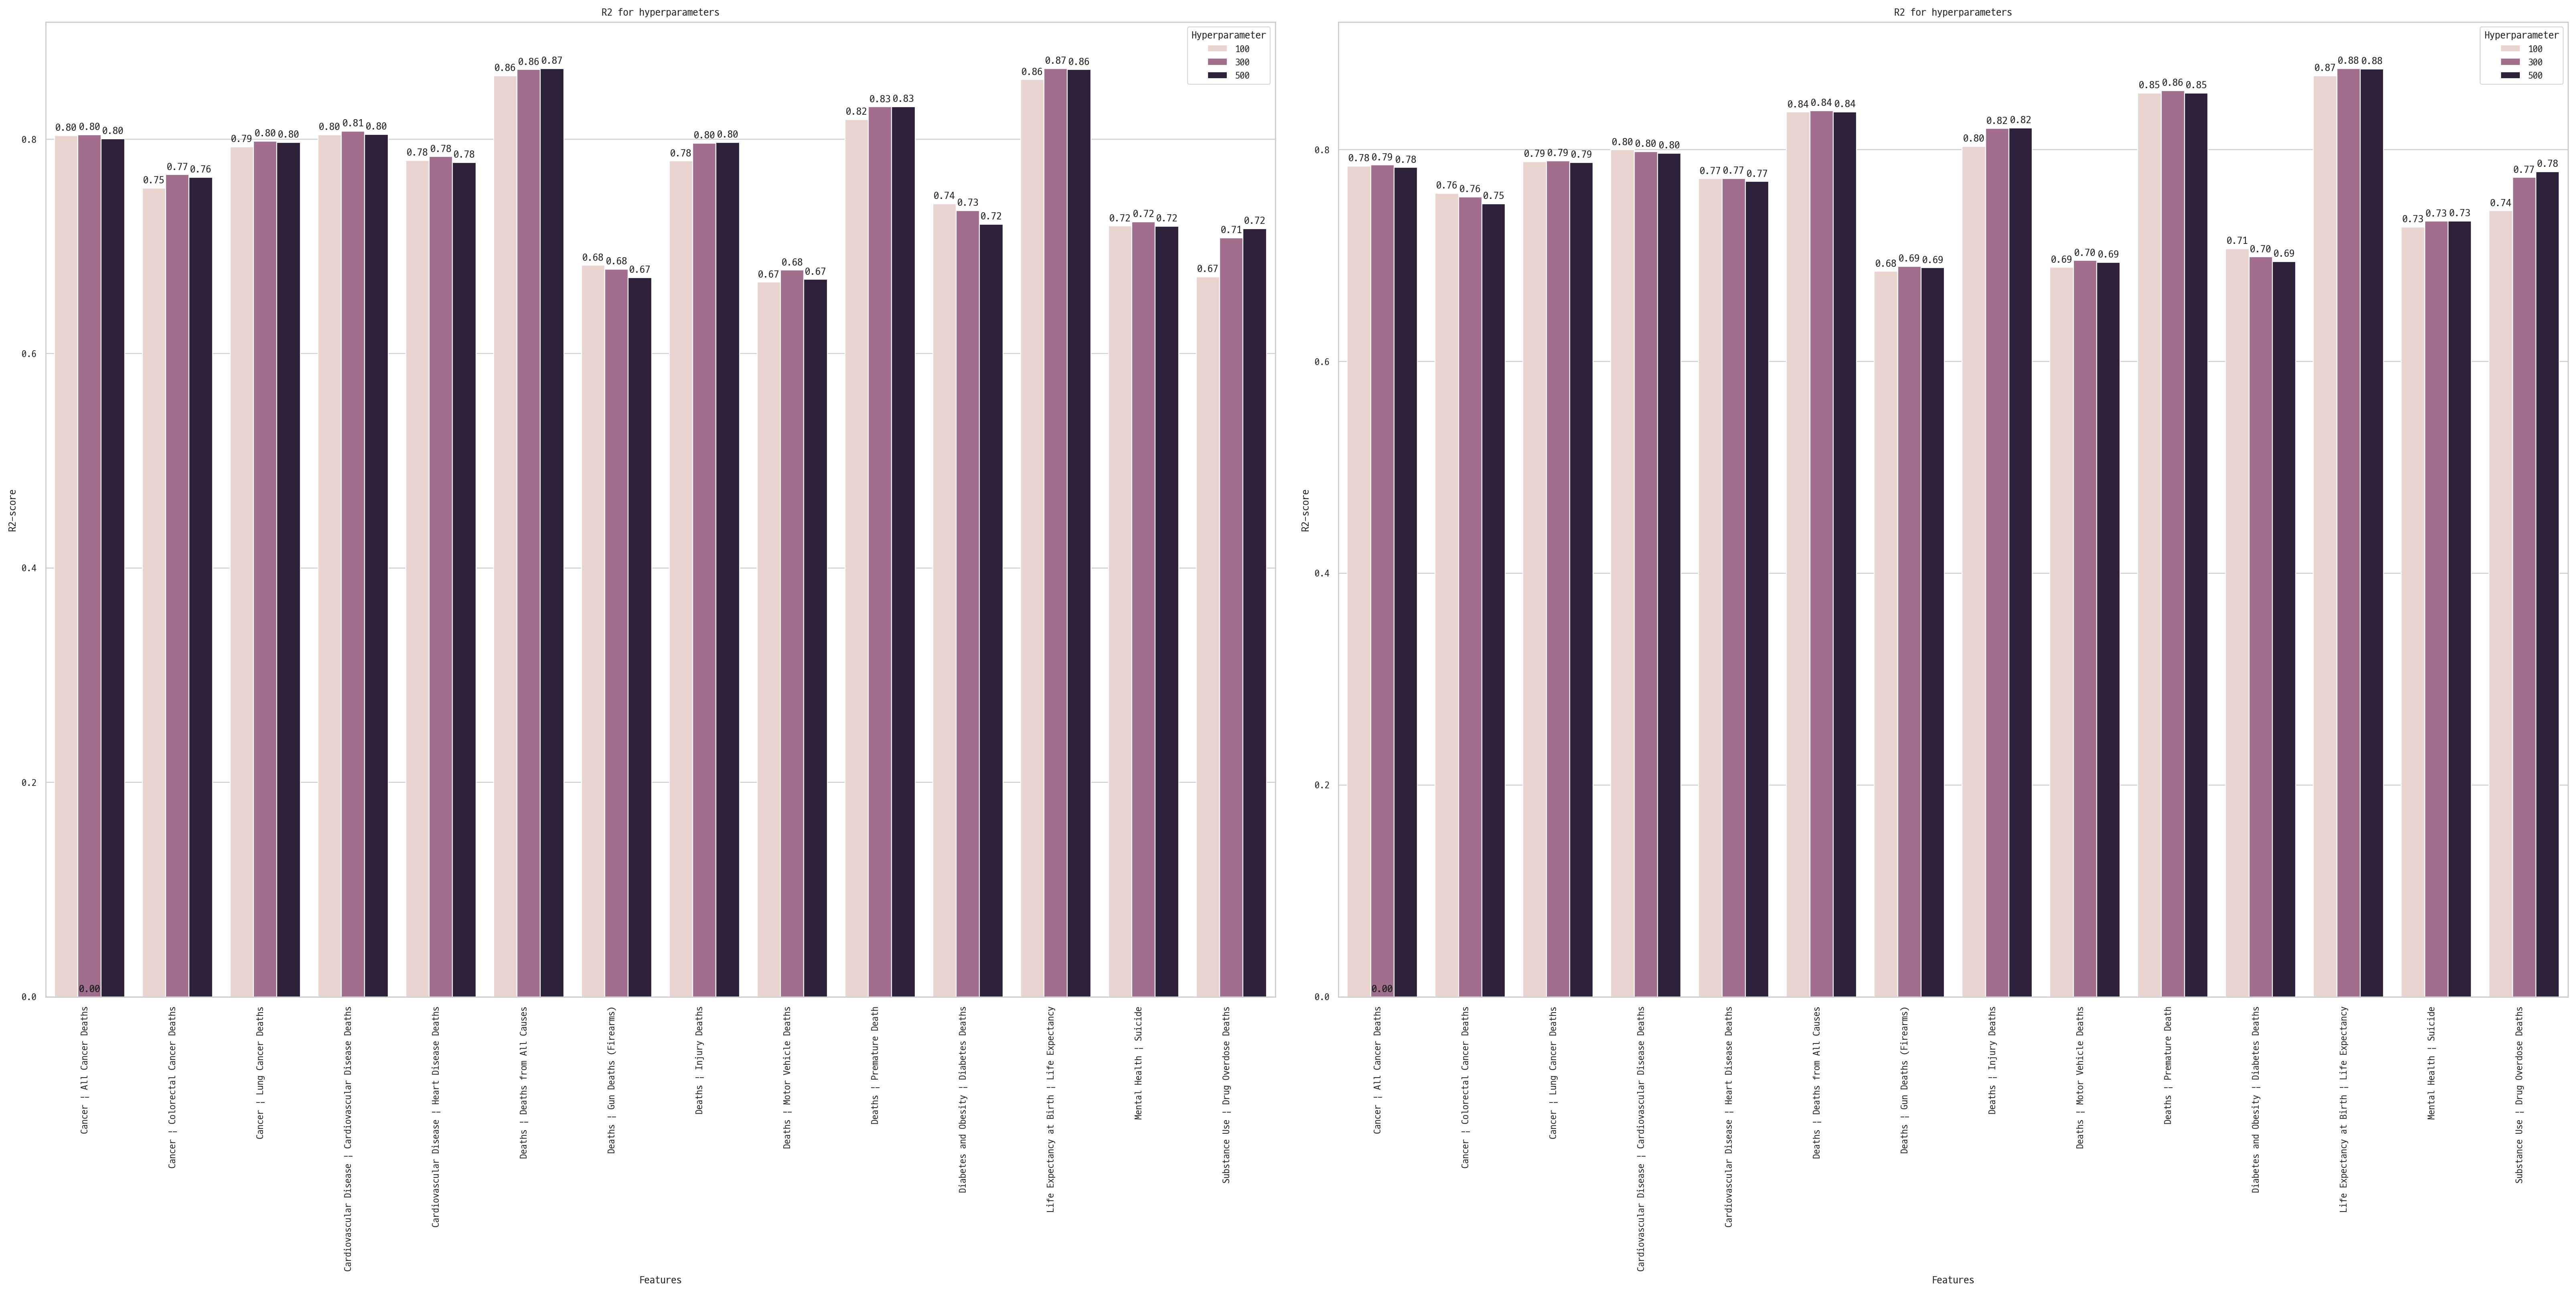

In [29]:
fig ,axes = plt.subplots(1,2,figsize=(32,16))

# combined_scores.keys()
# df_dict = nested_dict_to_df(combined_scores)

# df_dict



# for idx, key in enumerate(mlp_orig.keys()):
#     print(key)
#     data_dict = mlp_orig[key]
#     keys = data_dict.keys()

df_dict = nested_dict_to_df(xgb_knn[0.05]).reset_index()

df_dict = df_dict.rename(columns={"level_0": "Hyperparameter", "level_1": "Heuristics","level_3": "mode"})
# df_dict = df_dict[df_dict["Hyperparameter"] != 0.0001]
df_dict2 = df_dict[df_dict["Heuristics"] == False]
df_dict = df_dict[df_dict["Heuristics"] == True]
df_dict = df_dict[df_dict["mode"] == "test"]
df_dict2 = df_dict2[df_dict2["mode"] == "test"]
# pd.DataFrame.from_dict()

sns.barplot(data=df_dict,x='level_2', y='r2', hue = 'Hyperparameter', ax=axes[0])
axes[0].set_xticks(axes[0].get_xticks(), axes[0].get_xticklabels(), rotation=90, ha='right')

axes[0].set(xlabel="Features",ylabel="R2-score",title=f"R2 for hyperparameters")

for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 7), textcoords='offset points')
    

sns.barplot(data=df_dict2,x='level_2', y='r2', hue = 'Hyperparameter', ax=axes[1])
axes[1].set_xticks(axes[1].get_xticks(), axes[1].get_xticklabels(), rotation=90, ha='right')

axes[1].set(xlabel="Features",ylabel="R2-score",title=f"R2 for hyperparameters")

for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 7), textcoords='offset points')

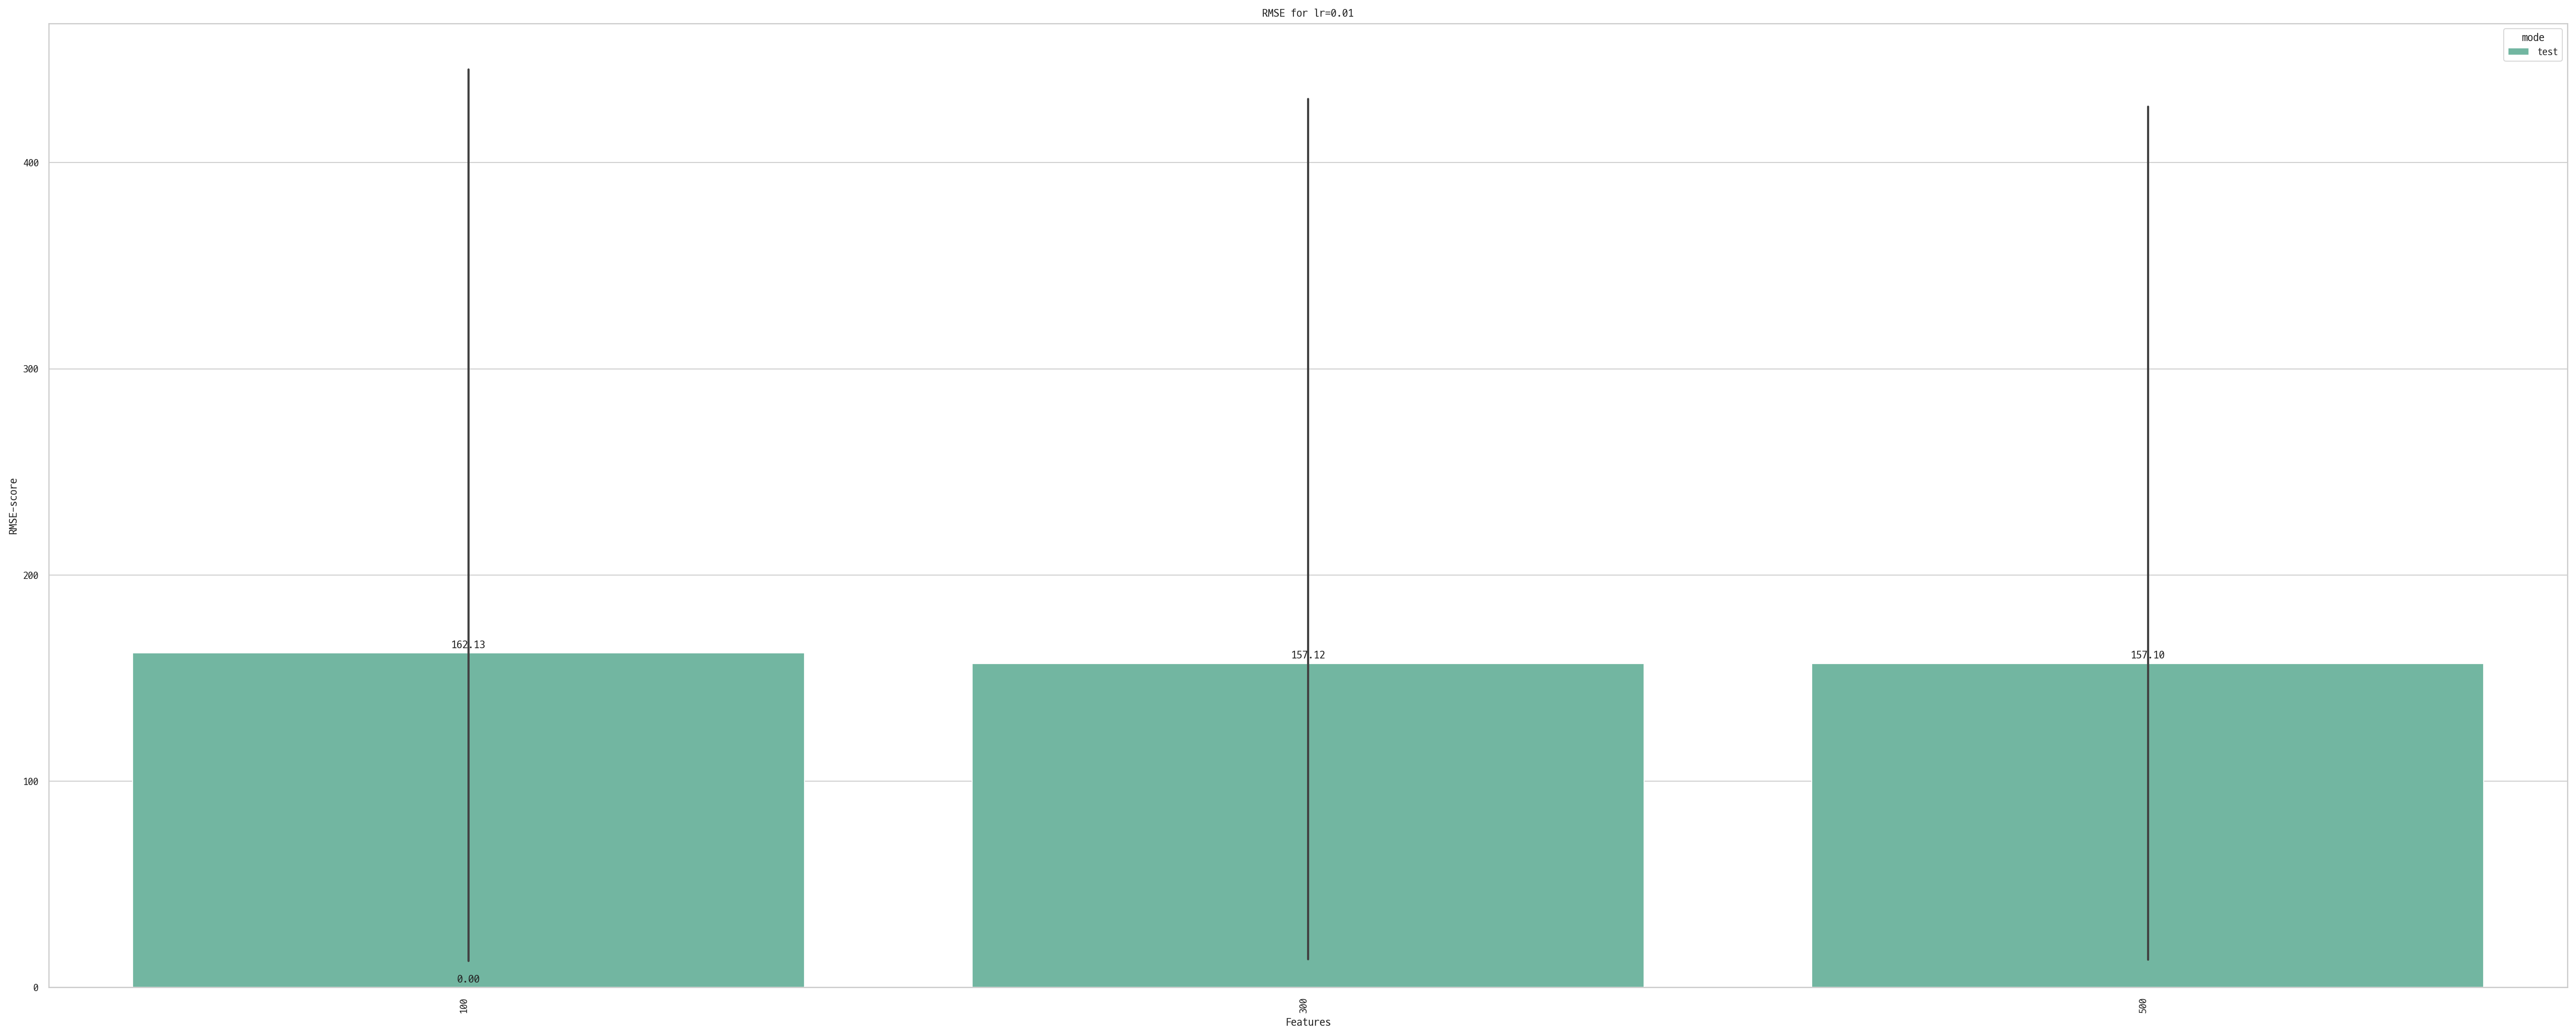

In [30]:
import seaborn as sns
fig ,axes = plt.subplots(1,1,figsize=(30,12))



sns.barplot(data=df_dict,x='Hyperparameter', y='rmse', hue = "mode", ax=axes)
axes.set_xticks(axes.get_xticks(), axes.get_xticklabels(), rotation=90, ha='right')

axes.set(xlabel="Features",ylabel="RMSE-score",title=f"RMSE for lr={key}")

for p in axes.patches:
    axes.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 7), textcoords='offset points')
    
plt.savefig('../results/knn.png')

In [31]:
df_dict_k = nested_dict_to_df(knn_score_dict).reset_index()
# df_dict_k = df_dict_k.drop(columns="level_1")

df_dict_b = nested_dict_to_df(base_score_dict).reset_index()
# df_dict_b = df_dict_b.drop(columns="level_1")

df_dict_k["Mode"] = "KNN"
df_dict_b["Mode"] = "Base"


In [32]:
df_dict_k = df_dict_k.rename(columns={"level_0": "Feature","r2_score":"r2","level_1":"Heuristics"})
df_dict_b = df_dict_b.rename(columns={"level_0": "Feature","r2_score":"r2","level_1":"Heuristics"})

In [33]:
df_dict_k.Feature.value_counts()

Feature
Active Transportation | Riding Bike to Work    2
Mental Health | Teen Mental Distress           2
Population | Single-Parent Families            2
Population | Seniors                           2
Population | Population Density                2
                                              ..
Education | College Graduates                  2
Disability | People with Disabilities          2
Dietary Quality | Teen Soda                    2
Dietary Quality | Teen Breakfast               2
Transportation | Public Transportation Use     2
Name: count, Length: 118, dtype: int64

In [34]:
df_dict_mlp_k = nested_dict_to_df(mlp_knn).reset_index()
df_dict_mlp_o = nested_dict_to_df(mlp_orig).reset_index()
df_dict_mlp_k

,level_0,level_1,level_2,level_3,mape,mse,r2,rmse
0,0.0001,False,Cancer | All Cancer Deaths,test,0.383883,3841.780762,-0.241549,61.982101
1,0.0001,False,Cancer | All Cancer Deaths,train,0.342874,3247.280273,-0.368083,56.984913
2,0.0001,False,Cancer | Colorectal Cancer Deaths,test,0.324447,30.805983,0.012072,5.550314
3,0.0001,False,Cancer | Colorectal Cancer Deaths,train,0.318278,28.107515,-0.095319,5.301652
4,0.0001,False,Cancer | Lung Cancer Deaths,test,0.568492,371.135864,-0.030355,19.264887
...,...,...,...,...,...,...,...,...
151,0.0100,True,Life Expectancy at Birth | Life Expectancy,train,0.051825,25.204399,0.036125,5.020398
152,0.0100,True,Mental Health | Suicide,test,0.838617,52.996536,-0.028291,7.279872
153,0.0100,True,Mental Health | Suicide,train,0.914754,69.938110,0.016514,8.362901
154,0.0100,True,Substance Use | Drug Overdose Deaths,test,1.454293,1165.711060,0.029064,34.142509


In [35]:

df_dict_rfc_k = nested_dict_to_df(rfc_knn).reset_index()
df_dict_rfc_o = nested_dict_to_df(rfc_orig).reset_index()


In [36]:

df_dict_xgb_k = nested_dict_to_df(xgb_knn).reset_index()
df_dict_xgb_o = nested_dict_to_df(xgb_orig).reset_index()

In [37]:
df_dict_rfc_o

,level_0,level_1,level_2,level_3,mape,mse,r2,rmse
0,50,False,Cancer | All Cancer Deaths,test,0.136382,791.109738,0.744337,28.126673
1,50,False,Cancer | All Cancer Deaths,train,0.050030,169.408304,0.927356,13.015695
2,50,False,Cancer | Colorectal Cancer Deaths,test,0.167519,10.897888,0.650512,3.301195
3,50,False,Cancer | Colorectal Cancer Deaths,train,0.059938,2.196836,0.914149,1.482173
4,50,False,Cancer | Lung Cancer Deaths,test,0.205590,92.980742,0.741865,9.642652
...,...,...,...,...,...,...,...,...
163,500,True,Life Expectancy at Birth | Life Expectancy,train,0.008736,1.194141,0.953889,1.092768
164,500,True,Mental Health | Suicide,test,0.302855,19.712078,0.617527,4.439829
165,500,True,Mental Health | Suicide,train,0.099284,5.363483,0.924940,2.315920
166,500,True,Substance Use | Drug Overdose Deaths,test,0.461582,481.621888,0.598851,21.945885


In [38]:
df_dict_rfc_k = df_dict_rfc_k[df_dict_rfc_k["level_3"] == "test"]
df_dict_rfc_o = df_dict_rfc_o[df_dict_rfc_o["level_3"] == "test"]

df_dict_rfc_o = df_dict_rfc_o[df_dict_rfc_o["level_0"] == 100]
df_dict_rfc_k = df_dict_rfc_k[df_dict_rfc_k["level_0"] == 100]

df_dict_rfc_k = df_dict_rfc_k.drop(columns=["level_0","level_3"])
df_dict_rfc_o = df_dict_rfc_o.drop(columns=["level_0","level_3"])

df_dict_rfc_k = df_dict_rfc_k.rename(columns={"level_2": "Feature","level_1":"Heuristics"})
df_dict_rfc_o = df_dict_rfc_o.rename(columns={"level_2": "Feature","level_1":"Heuristics"})

df_dict_rfc_k["Mode"] = "RFC_KNN"
df_dict_rfc_o["Mode"] = "RFC_Base"

In [39]:
df_dict_mlp_k = df_dict_mlp_k[df_dict_mlp_k["level_3"] == "test"]
df_dict_mlp_o = df_dict_mlp_o[df_dict_mlp_o["level_3"] == "test"]

df_dict_mlp_o = df_dict_mlp_o[df_dict_mlp_o["level_0"] == 0.01]
df_dict_mlp_k = df_dict_mlp_k[df_dict_mlp_k["level_0"] == 0.01]

df_dict_mlp_k = df_dict_mlp_k.drop(columns=["level_0","level_3"])
df_dict_mlp_o = df_dict_mlp_o.drop(columns=["level_0","level_3"])

df_dict_mlp_k = df_dict_mlp_k.rename(columns={"level_2": "Feature","level_1":"Heuristics"})
df_dict_mlp_o = df_dict_mlp_o.rename(columns={"level_2": "Feature","level_1":"Heuristics"})

df_dict_mlp_k["Mode"] = "MLP_KNN"
df_dict_mlp_o["Mode"] = "MLP_Base"


In [40]:
df_dict_xgb_o = df_dict_xgb_o[(df_dict_xgb_o["level_0"] == 0.1) & (df_dict_xgb_o["level_1"] == 100) & (df_dict_xgb_o["level_4"] == "test")]
df_dict_xgb_k = df_dict_xgb_k[(df_dict_xgb_k["level_0"] == 0.1) & (df_dict_xgb_k["level_1"] == 100) & (df_dict_xgb_k["level_4"] == "test")]

df_dict_xgb_k = df_dict_xgb_k.drop(columns=["level_0","level_1","level_4"])
df_dict_xgb_o = df_dict_xgb_o.drop(columns=["level_0","level_1","level_4"])

df_dict_xgb_k = df_dict_xgb_k.rename(columns={"level_2": "Heuristics","level_3": "Feature"})
df_dict_xgb_o = df_dict_xgb_o.rename(columns={"level_2": "Heuristics","level_3": "Feature"})

df_dict_xgb_k["Mode"] = "XGB_KNN"
df_dict_xgb_o["Mode"] = "XGB_Base"

In [41]:
df_dict_k = df_dict_k[df_dict_k["Feature"].isin(df_dict_xgb_k["Feature"].unique())]
df_dict_b = df_dict_b[df_dict_b["Feature"].isin(df_dict_xgb_k["Feature"].unique())]

In [53]:
# MLP 포함 비교 할때
df_dict = pd.concat([df_dict_k,df_dict_b,df_dict_mlp_k,df_dict_mlp_o,df_dict_rfc_k,df_dict_rfc_o,df_dict_xgb_k,df_dict_xgb_o])

In [51]:
# MLP 제외 비교 할때
df_dict = pd.concat([df_dict_k,df_dict_b,df_dict_rfc_k,df_dict_rfc_o,df_dict_xgb_k,df_dict_xgb_o])

In [44]:
# KNN 전처리 데이터 사용 모델과 전처리 X 데이터 사용 모델 분리 필요
df_knn = df_dict[(df_dict["Mode"].str.contains('KNN'))].copy()
df_base = df_dict[(df_dict["Mode"].str.contains('Base'))].copy()

In [45]:
df_knn[['Feature','Mode']].value_counts()
cond0 = df_knn['Mode'] == 'KNN'
cond1 = df_knn['Feature'] == 'Cancer | Colorectal Cancer Deaths'
df_knn[cond0&cond1]

,Feature,Heuristics,mape,msle,r2,rmse,Mode,mse
22,Cancer | Colorectal Cancer Deaths,False,0.073363,0.0,0.864229,1.886979,KNN,NaN
23,Cancer | Colorectal Cancer Deaths,True,0.073363,0.0,0.864229,1.886979,KNN,NaN


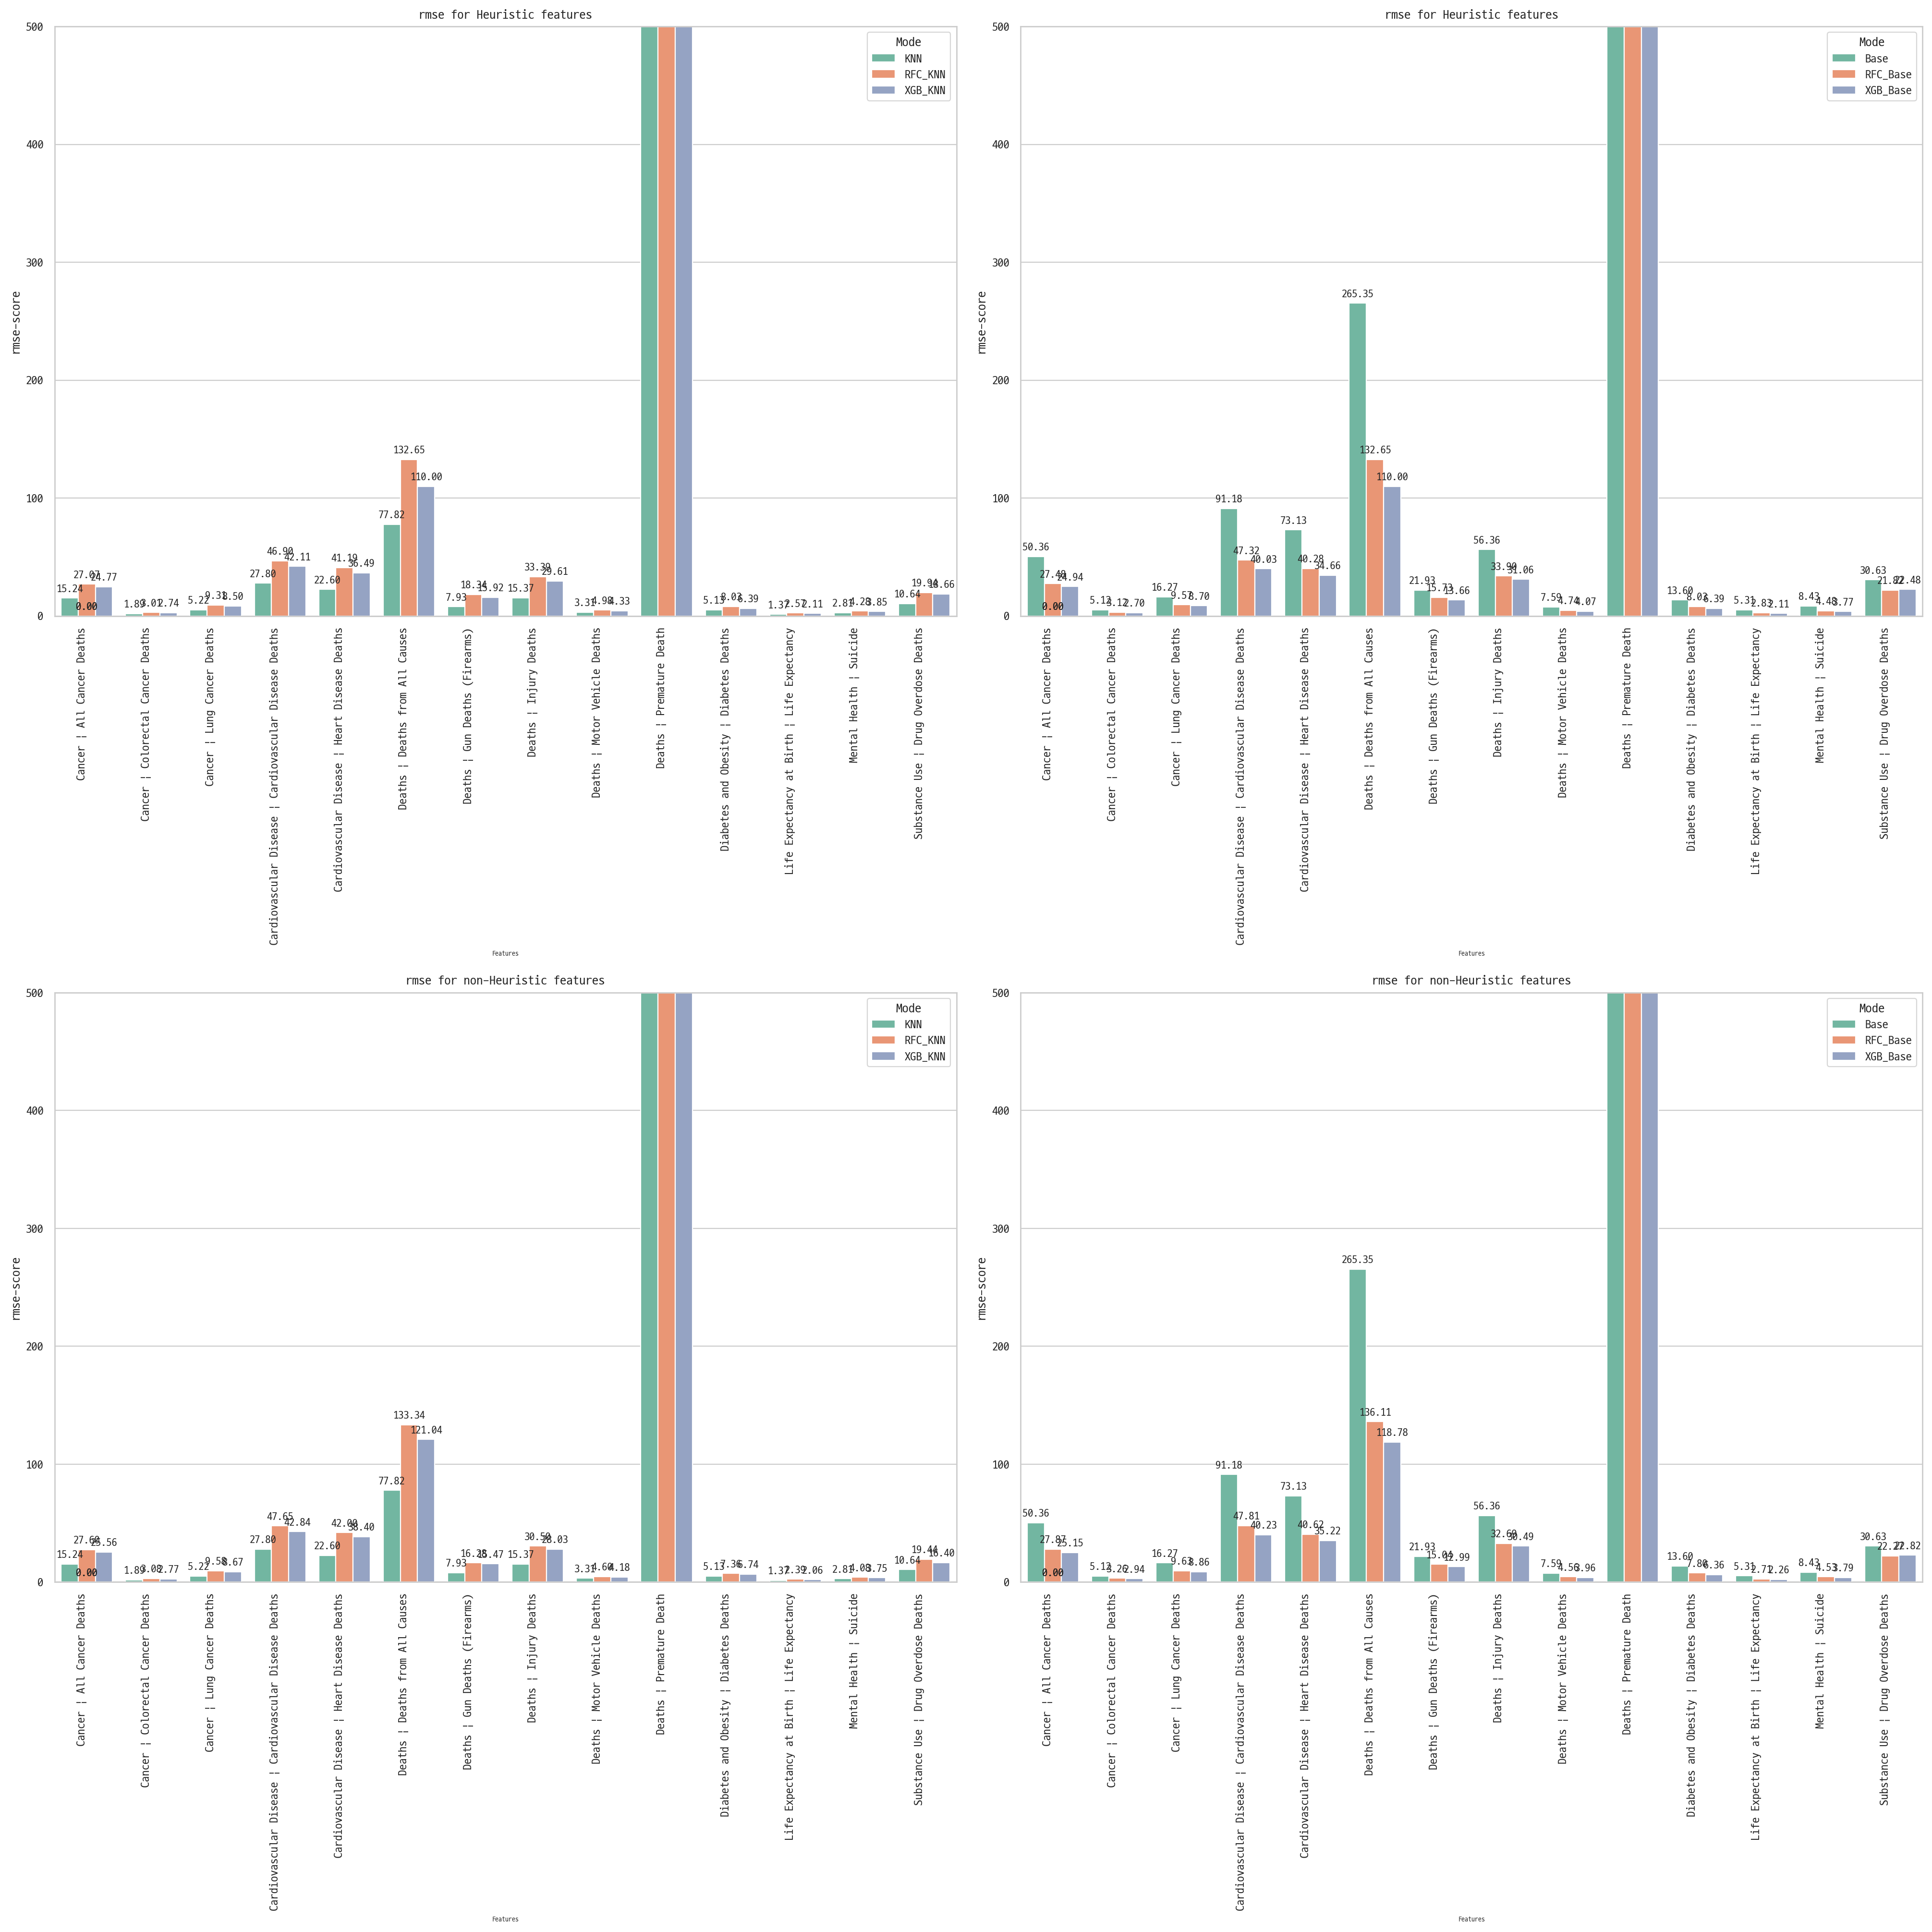

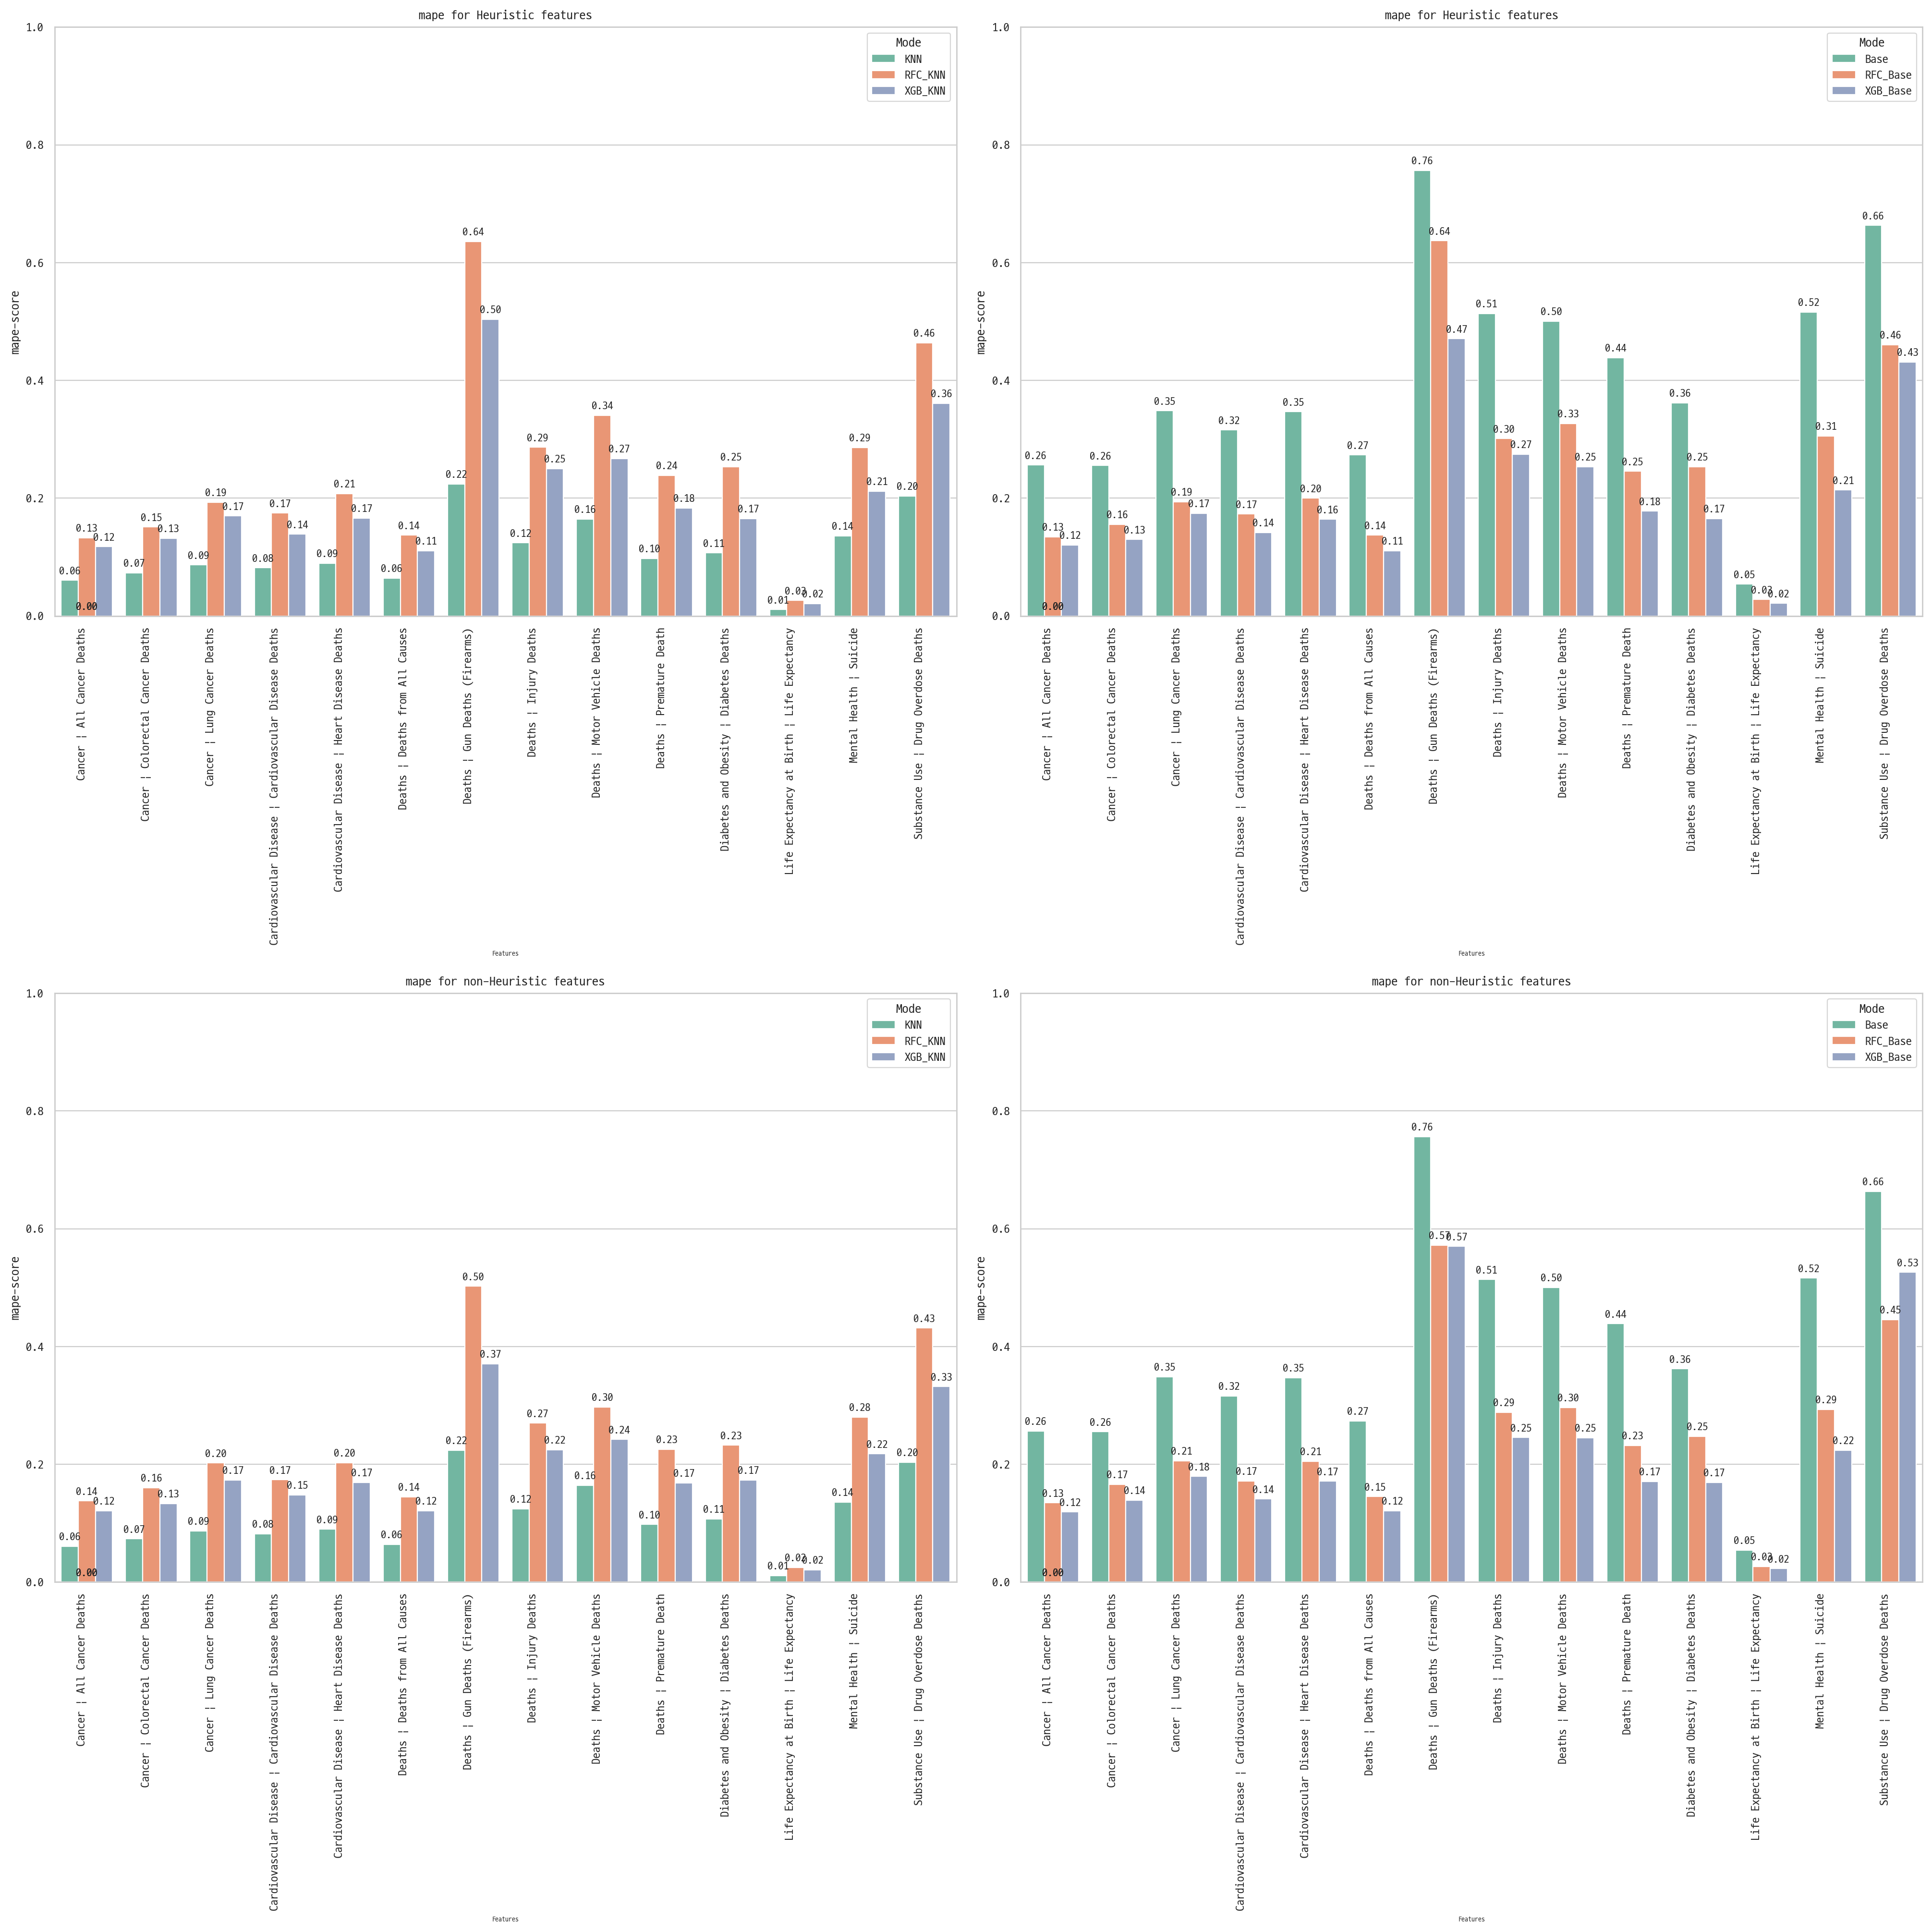

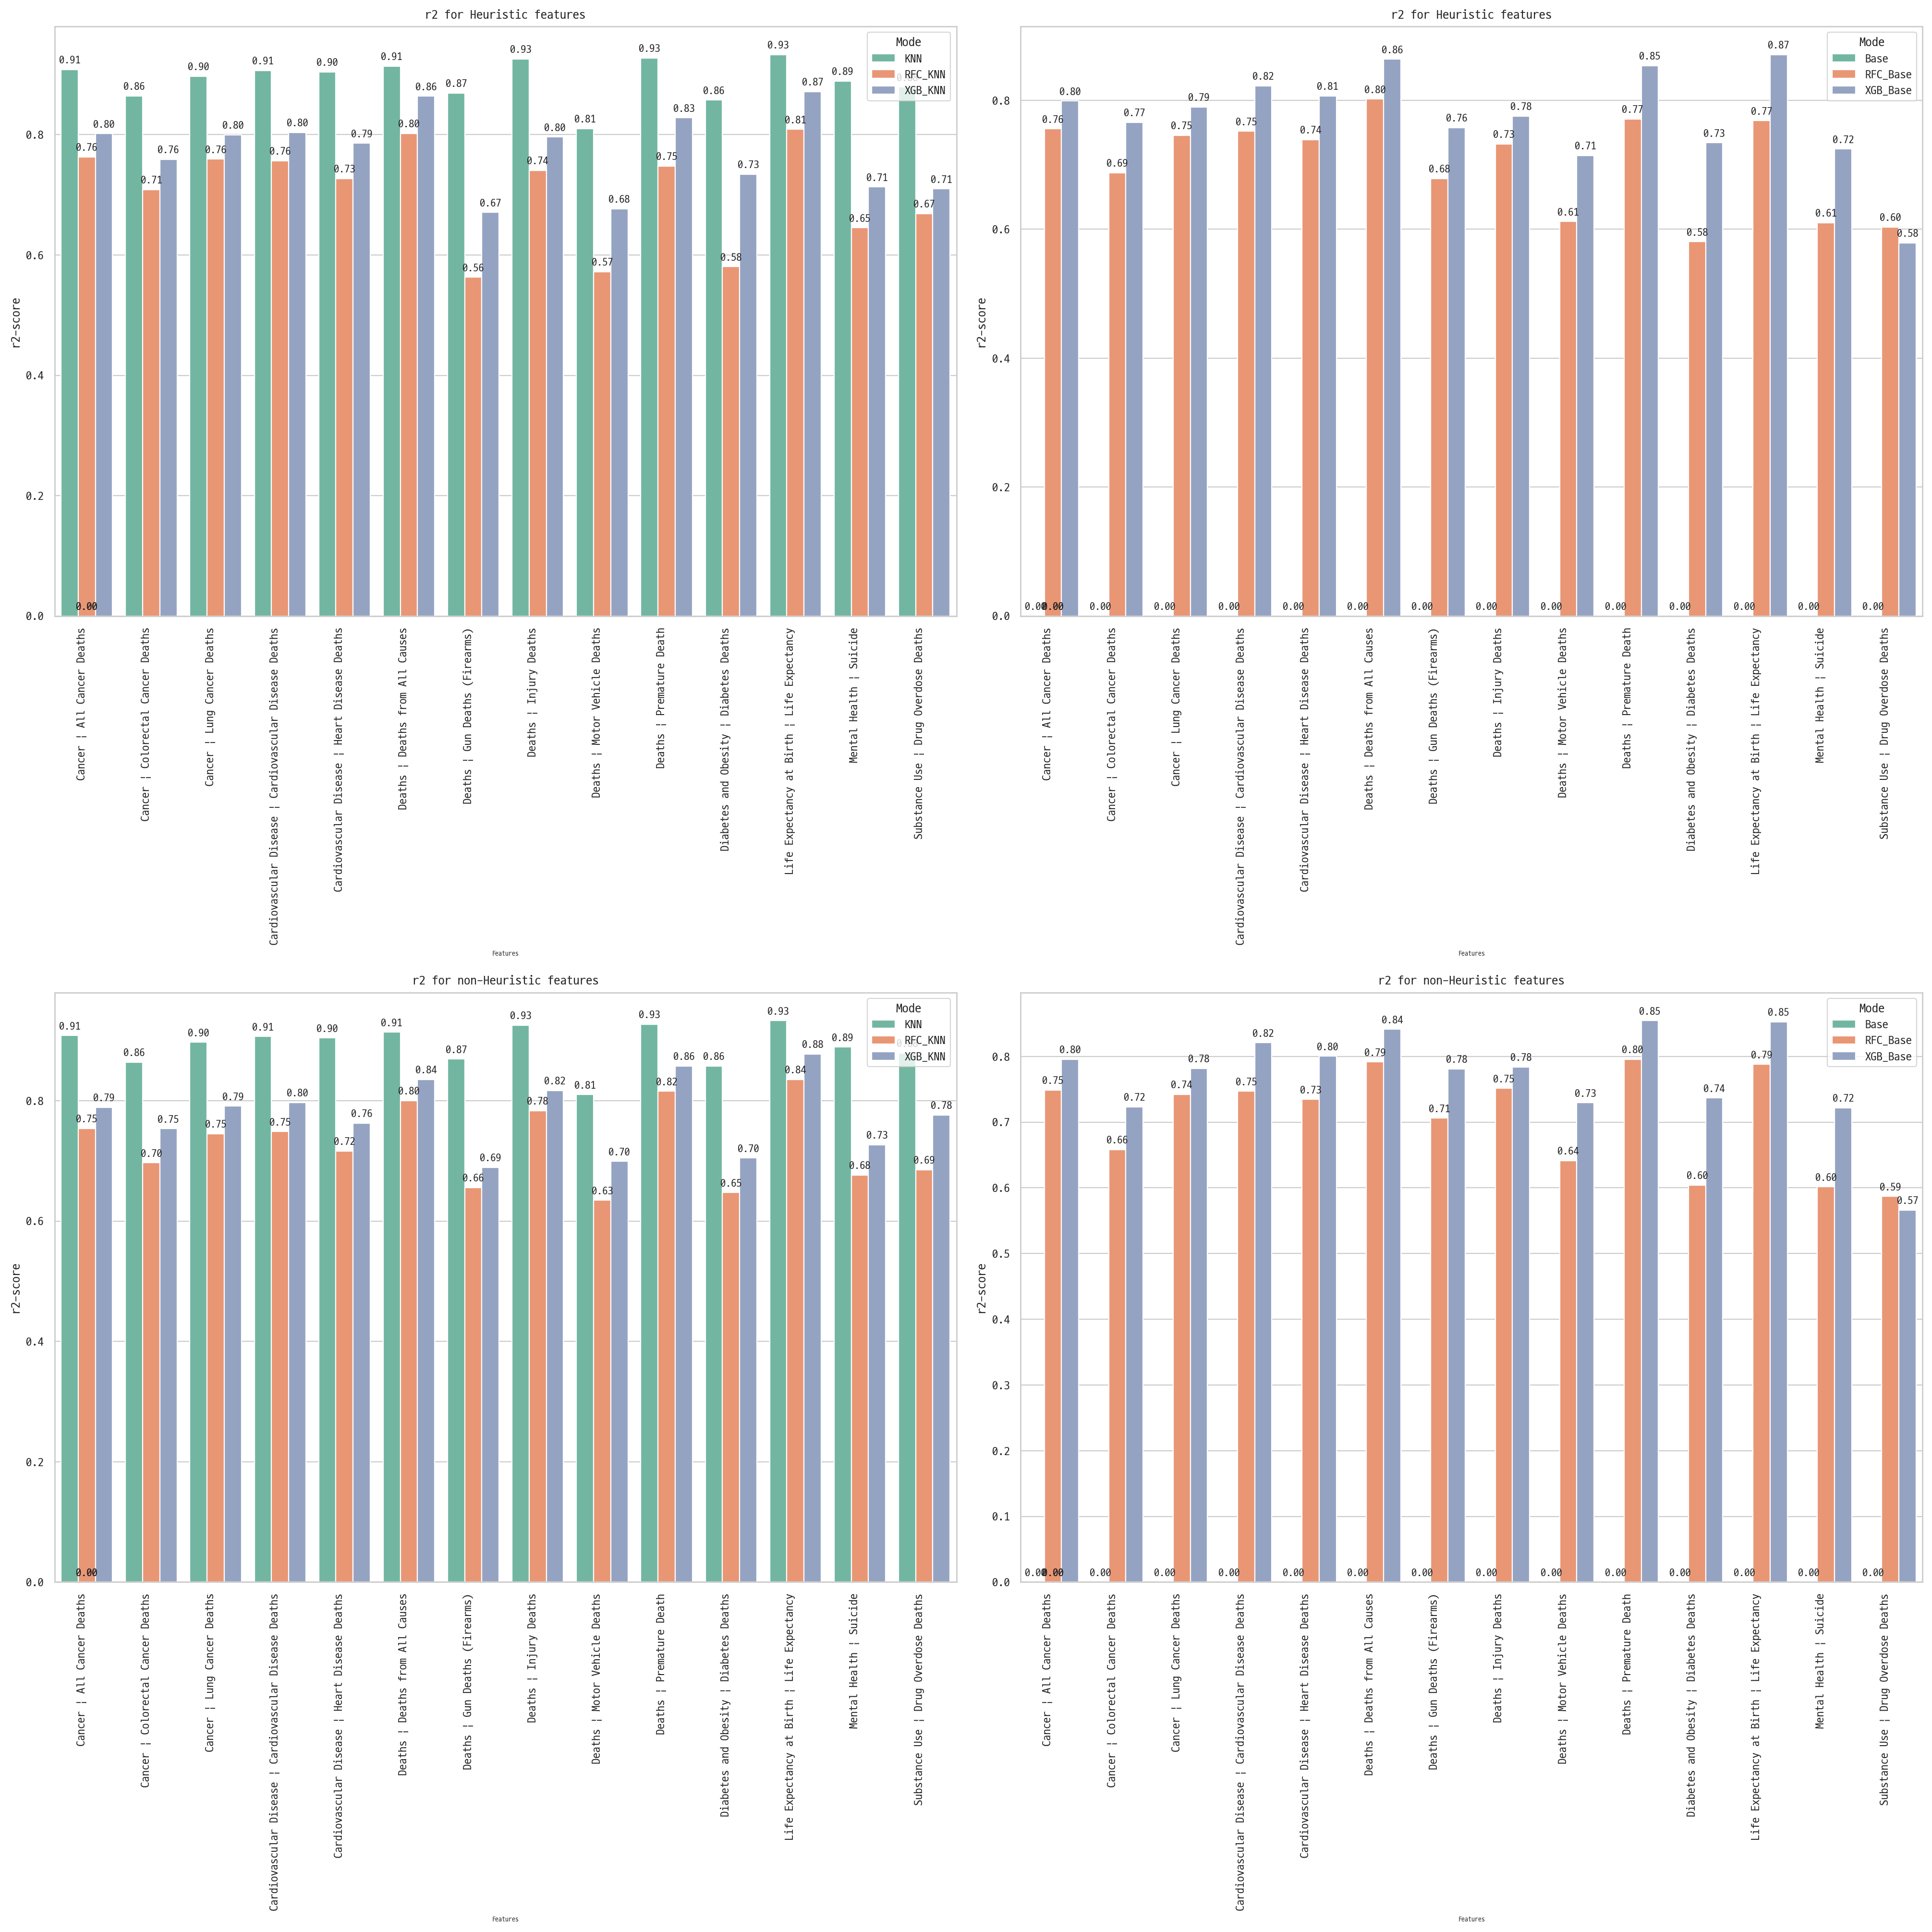

In [46]:
# 3가지 통계량에 대해 시각화 비교 플롯
import seaborn as sns
font_size = 5
annotsize = 8
ylims = [500, 1, None]
# ylim = None
metrics = ["rmse","mape","r2"]

for i, metric in enumerate(metrics):
    ylim = ylims[i]
    fig ,axes = plt.subplots(2,2,figsize=(20,20))

    df_knn = df_dict[(df_dict["Mode"].str.contains('KNN'))].copy()
    df_base = df_dict[(df_dict["Mode"].str.contains('Base'))].copy()

    # True-KNN
    sns.barplot(data=df_knn[df_knn["Heuristics"] == True],x='Feature', y=metric, hue = "Mode", ax=axes[0][0])
    axes[0][0].set_xticks(axes[0][0].get_xticks(), axes[0][0].get_xticklabels(), rotation=90, ha='right')

    axes[0][0].set(xlabel="Features",ylabel=f"{metric}-score",title=f"{metric} for Heuristic features")

    for p in axes[0][0].patches:
        axes[0][0].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext =(0, 7), textcoords='offset points',fontsize=annotsize)

    axes[0][0].xaxis.label.set_size(font_size)
    axes[0][0].set_ylim(top=ylim)
        
    #True-Base
    sns.barplot(data=df_base[df_base["Heuristics"] == True],x='Feature', y=metric, hue = "Mode", ax=axes[0][1])
    axes[0][1].set_xticks(axes[0][1].get_xticks(), axes[0][1].get_xticklabels(), rotation=90, ha='right')

    axes[0][1].set(xlabel="Features",ylabel=f"{metric}-score",title=f"{metric} for Heuristic features")

    for p in axes[0][1].patches:
        axes[0][1].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext =(0, 7), textcoords='offset points',fontsize=annotsize)

    axes[0][1].xaxis.label.set_size(font_size)
    axes[0][1].set_ylim(top=ylim)

    # False-KNN
    sns.barplot(data=df_knn[df_knn["Heuristics"] == False],x='Feature', y=metric, hue = "Mode", ax=axes[1][0])
    axes[1][0].set_xticks(axes[1][0].get_xticks(), axes[1][0].get_xticklabels(), rotation=90, ha='right')

    axes[1][0].set(xlabel="Features",ylabel=f"{metric}-score",title=f"{metric} for non-Heuristic features")

    for p in axes[1][0].patches:
        axes[1][0].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext =(0, 7), textcoords='offset points',fontsize=annotsize)

    axes[1][0].xaxis.label.set_size(font_size)
    axes[1][0].set_ylim(top=ylim)

    #False-Base
    sns.barplot(data=df_base[df_base["Heuristics"] == False],x='Feature', y=metric, hue = "Mode", ax=axes[1][1])
    axes[1][1].set_xticks(axes[1][1].get_xticks(), axes[1][1].get_xticklabels(), rotation=90, ha='right')

    axes[1][1].set(xlabel="Features",ylabel=f"{metric}-score",title=f"{metric} for non-Heuristic features")

    for p in axes[1][1].patches:
        axes[1][1].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext =(0, 7), textcoords='offset points',fontsize=annotsize)

    axes[1][1].xaxis.label.set_size(font_size)    
    axes[1][1].set_ylim(top=ylim)
        
 #   plt.savefig(f'./results/compare_{metric}_expanded.png')

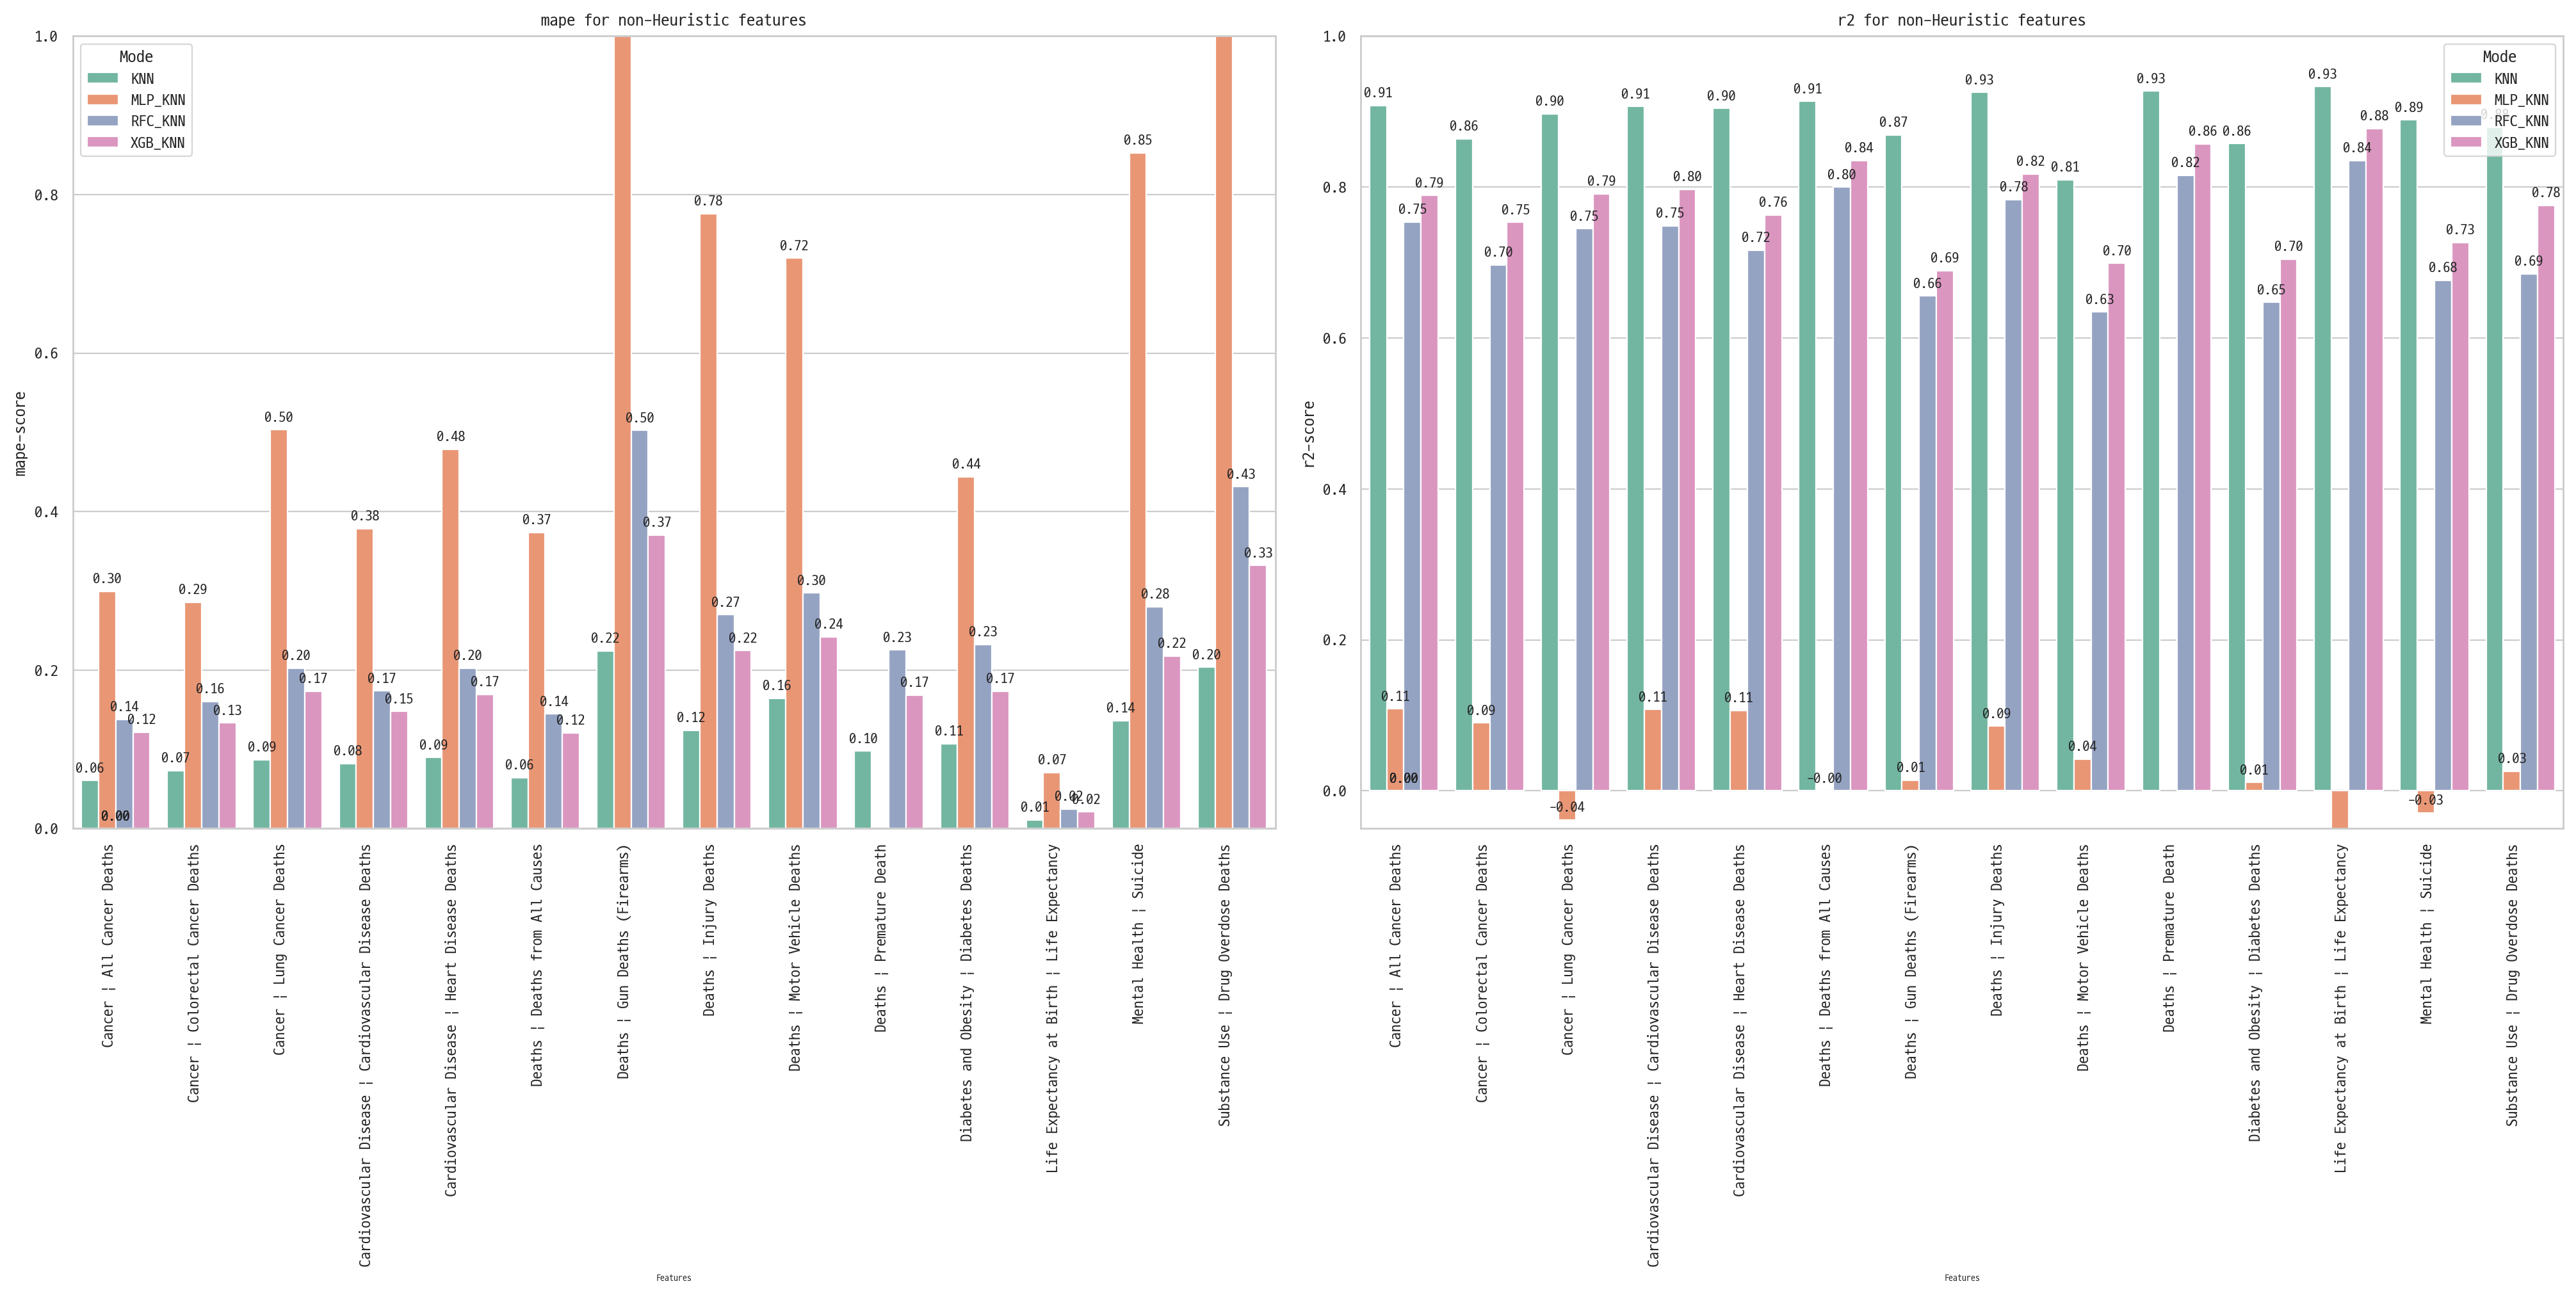

In [54]:
# 3가지 통계량에 대해 시각화 비교 플롯
import seaborn as sns
font_size = 5
annotsize = 8
ylims = [1, None]
ylims2 = [None, -0.05]
# ylim = None
metrics = ["mape","r2"]
fig ,axes = plt.subplots(1,2,figsize=(20,10))

for i, metric in enumerate(metrics):
    ylim = ylims[i]

    df_knn = df_dict[(df_dict["Mode"].str.contains('KNN'))].copy()
    df_base = df_dict[(df_dict["Mode"].str.contains('Base'))].copy()


    # False-KNN
    sns.barplot(data=df_knn[df_knn["Heuristics"] == False],x='Feature', y=metric, hue = "Mode", ax=axes[i])
    axes[i].set_xticks(axes[i].get_xticks(), axes[i].get_xticklabels(), rotation=90, ha='right')

    axes[i].set(xlabel="Features",ylabel=f"{metric}-score",title=f"{metric} for non-Heuristic features")

    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext =(0, 7), textcoords='offset points',fontsize=annotsize)

    axes[i].xaxis.label.set_size(font_size)
    axes[i].set_ylim(top=ylim)
    axes[i].set_ylim(bottom=ylims2[i])
